In [38]:
%matplotlib inline
from fastai.basics import *

## Linear regression

$$y = ax +b $$
and let's assume that the data is distributed with $a = 2$, $b=3$ and some random noise

In [39]:
n = 100
x = torch.ones((n, 2))
x[:, 0] = torch.linspace(0, n)
x[:, 0] = torch.rand(n)

In [40]:
y = x@a + torch.rand(n)

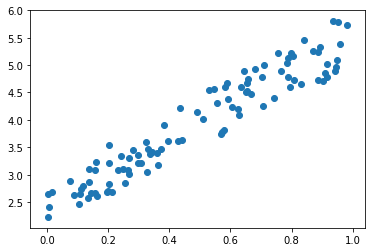

In [41]:
plt.scatter(x[:,0], y)

In [42]:
def my_mse(y_hat: torch.Tensor, y: torch.Tensor):
    return ((y_hat - y)**2).mean()

Initial parameter estimate is random

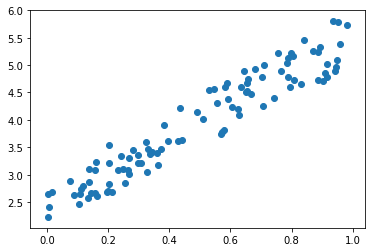

In [43]:
plt.scatter(x[:, 0], y)

In [44]:
def update():
    y_hat = x@w
    loss = my_mse(y_hat, y)
    loss.backward()
    if i % 100 == 0: print(loss)
    with torch.no_grad():
        w.sub_(lr*w.grad)
        w.grad.zero_()    

In [58]:
w = nn.Parameter(torch.rand(2))
lr = 0.01
for i in range(100):
    update()

tensor(11.4898, grad_fn=<MeanBackward1>)


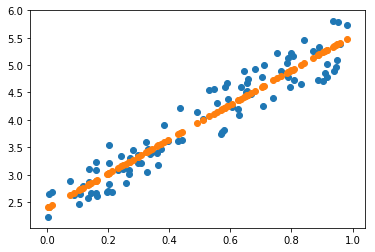

In [46]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], x@w)

In [60]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [67]:
w = nn.Parameter(torch.rand(2))

fig = plt.figure()
plt.scatter(x[:, 0], y, c='orange')
line, = plt.plot(x[:, 0], x@w)
plt.close()

In [68]:
def animate(i):
    update()
    line.set_ydata(x@w)
    return line,

In [69]:
lr = 0.05

In [70]:
animation.FuncAnimation(fig, animate, np.arange(300), interval=50)